# Data Exploration: Land surface temperature in Baltimore

In [1]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# regression libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence

RANDOM_SEED = 3201

In [2]:
# import data
df = pd.read_csv('../../data/processed/grid/bal/2018-09-23/bal_data_500.csv')

# Describe

In [3]:
df.head()

,Unnamed: 0,x,y,cId,area,city,lst_day_mean,lst_day_max,lst_day_min,lst_day_var,...,svf_min_sl,svf_var_sl,dsm_mean_sl,dsm_max_sl,dsm_min_sl,dsm_var_sl,elev_mean_sl,elev_max_sl,elev_min_sl,elev_var_sl
0,g1,424996.178971,189212.211496,1,140184.769096,bal,43.367470,46.500084,32.023964,5.837849,...,0.511540,0.004211,142.371745,169.336100,133.097992,22.199209,139.606597,145.219447,133.393799,7.208365
1,g2,425496.178971,189212.211496,2,193761.065187,bal,42.892341,43.946873,32.320313,3.220659,...,0.474512,0.004252,140.852061,168.710333,131.186140,24.329985,137.912241,144.255893,131.701286,8.386091
2,g3,425996.178971,189212.211496,3,193668.023016,bal,42.943431,45.691372,32.593929,2.422381,...,0.479303,0.004474,137.036830,162.869800,126.232266,27.974555,133.755894,140.949216,126.962926,10.885735
3,g4,426496.178971,189212.211496,4,196080.635845,bal,44.308076,46.172302,31.623096,3.231454,...,0.486267,0.004496,135.087403,161.585580,122.034760,29.824237,131.290824,137.672006,122.528197,11.919663
4,g5,426996.178971,189212.211496,5,195121.646444,bal,41.612921,45.883125,30.076824,20.484108,...,0.485692,0.004507,132.435080,157.700128,118.805257,33.532620,128.647962,135.464316,119.184160,14.094179


In [4]:
names = df.columns.values
names

array(['Unnamed: 0', 'x', 'y', 'cId', 'area', 'city', 'lst_day_mean',
       'lst_day_max', 'lst_day_min', 'lst_day_var', 'lst_night_mean',
       'lst_night_max', 'lst_night_min', 'lst_night_var', 'alb_mean',
       'alb_max', 'alb_min', 'alb_var', 'ndvi_mean', 'ndvi_max',
       'ndvi_min', 'ndvi_var', 'lcov_11', 'lcov_21', 'lcov_22', 'lcov_23',
       'lcov_24', 'lcov_31', 'lcov_41', 'lcov_42', 'lcov_43', 'lcov_52',
       'lcov_71', 'lcov_90', 'lcov_95', 'tree_mean', 'tree_max',
       'tree_min', 'tree_var', 'imp_mean', 'imp_max', 'imp_min',
       'imp_var', 'nbdi_mean', 'nbdi_max', 'nbdi_min', 'nbdi_var',
       'GISJOIN', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLOCKCE10',
       'GEOID10', 'NAME10', 'MTFCC10', 'UR10', 'UACE10', 'UATYP10',
       'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10',
       'Shape_area', 'Shape_len', 'polyArea', 'pop', 'pop_dens', 'bldg',
       'ntl_mean', 'ntl_max', 'ntl_min', 'ntl_var', 'svf_mean', 'svf_max',
       'svf_min', 'sv

Remove the lat, long, name, cId columns and area == 0 rows

In [5]:
df = df.drop(['Unnamed: 0', 'x', 'y', 'cId'], axis = 1)

In [6]:
df = df[df['area'] > 0]

In [7]:
df.head()

,area,city,lst_day_mean,lst_day_max,lst_day_min,lst_day_var,lst_night_mean,lst_night_max,lst_night_min,lst_night_var,...,svf_min_sl,svf_var_sl,dsm_mean_sl,dsm_max_sl,dsm_min_sl,dsm_var_sl,elev_mean_sl,elev_max_sl,elev_min_sl,elev_var_sl
0,140184.769096,bal,43.367470,46.500084,32.023964,5.837849,28.524205,29.695961,20.076870,2.179197,...,0.511540,0.004211,142.371745,169.336100,133.097992,22.199209,139.606597,145.219447,133.393799,7.208365
1,193761.065187,bal,42.892341,43.946873,32.320313,3.220659,28.445516,29.424200,20.636292,1.740351,...,0.474512,0.004252,140.852061,168.710333,131.186140,24.329985,137.912241,144.255893,131.701286,8.386091
2,193668.023016,bal,42.943431,45.691372,32.593929,2.422381,28.362636,28.852781,20.449043,1.119835,...,0.479303,0.004474,137.036830,162.869800,126.232266,27.974555,133.755894,140.949216,126.962926,10.885735
3,196080.635845,bal,44.308076,46.172302,31.623096,3.231454,28.912349,29.624800,20.550053,0.864687,...,0.486267,0.004496,135.087403,161.585580,122.034760,29.824237,131.290824,137.672006,122.528197,11.919663
4,195121.646444,bal,41.612921,45.883125,30.076824,20.484108,27.828888,29.653679,20.544888,8.743918,...,0.485692,0.004507,132.435080,157.700128,118.805257,33.532620,128.647962,135.464316,119.184160,14.094179


In [8]:
df.describe()

,area,lst_day_mean,lst_day_max,lst_day_min,lst_day_var,lst_night_mean,lst_night_max,lst_night_min,lst_night_var,alb_mean,...,svf_min_sl,svf_var_sl,dsm_mean_sl,dsm_max_sl,dsm_min_sl,dsm_var_sl,elev_mean_sl,elev_max_sl,elev_min_sl,elev_var_sl
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,...,1004.000000,9.850000e+02,985.000000,1004.000000,1004.000000,985.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,237452.729505,40.260809,44.669704,33.538614,12.261839,28.491606,30.592737,24.085669,4.873047,66.803387,...,inf,3.931581e-03,54.796111,-inf,inf,55.002754,51.629360,62.076745,41.290117,35.181804
std,39405.491172,6.413056,5.926548,7.567433,18.332249,2.363559,2.257531,4.200890,6.797848,11.025376,...,NaN,3.025595e-03,43.400247,NaN,NaN,45.042828,42.845215,44.878914,39.488328,38.740211
min,68.800679,21.578333,21.782961,19.782183,0.001542,20.526812,22.603706,16.375092,0.000773,45.679676,...,0.115733,1.356685e-07,0.209814,-inf,-7.290245,0.020905,0.000000,0.000000,-0.854140,0.000000
25%,250000.000000,38.495353,43.766696,27.935274,1.206761,27.724201,29.751903,20.443534,0.155049,60.014393,...,0.470333,2.175093e-03,14.996280,45.452729,4.413031,29.743535,11.670031,21.588522,4.196070,12.482888
50%,250000.000000,42.150590,45.707439,31.061872,4.007538,29.170158,30.699022,21.712217,1.271267,65.437830,...,0.547484,3.265752e-03,45.556154,77.515270,31.329866,42.363148,42.095871,53.241313,29.832185,25.554353
75%,250000.000000,44.407156,47.746306,41.231366,17.048998,30.046824,31.727345,28.694732,7.919555,73.260514,...,0.628693,4.917161e-03,93.215997,123.188281,73.960611,61.719651,89.145382,104.787112,72.157920,41.543844
max,250000.000000,49.151763,58.582375,47.422459,107.789241,32.778806,35.316219,31.341824,32.864295,133.089308,...,inf,2.613065e-02,143.426654,176.591482,inf,288.939178,140.895922,146.305188,135.038254,269.000551


## Response

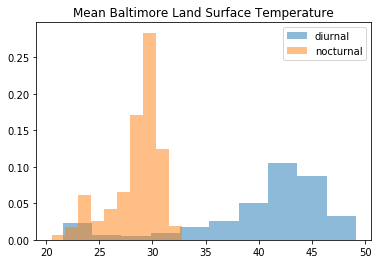

In [9]:
plt.hist(df['lst_day_mean'], density = True, label = "diurnal", alpha = 0.5)
plt.hist(df['lst_night_mean'], density = True, label = "nocturnal", alpha = 0.5)
plt.legend(loc='upper right')
plt.title("Mean Baltimore Land Surface Temperature")
plt.show()

In [10]:
lst_vars = ['lst_day_mean','lst_night_mean', 'lst_day_min', 'lst_day_var', 'lst_day_max', 'lst_night_min', 'lst_night_max','lst_night_var']
df_lst = df[lst_vars]

lst_vars_sl = [var + '_sl' for var in lst_vars]
df = df.drop(lst_vars, axis=1)
df = df.drop(lst_vars_sl, axis=1)

# Divide into test and train

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    df, df_lst, test_size=0.2, random_state=RANDOM_SEED)

## Scale the variables

In [12]:
X_train = X_train.drop('city', axis=1)
X_test = X_test.drop('city', axis=1)
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(data = X_scaled, columns = X_train.columns.values)
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns.values)

ValueError: could not convert string to float: '-076.5758053&-076.5737207'

In [ ]:
# make a copy
train = pd.concat([y_train.copy(), X_train.copy()], axis=1)
train  = train.drop(['lst_day_mean_min', 'lst_day_mean_max', 'lst_night_mean_min', 'lst_night_mean_max'], axis=1)
train_nospatlag = train[train.columns[0:27]]
train.head()


In [ ]:
train.columns.values

# Explore correlations

## Response

In [ ]:
corr_matrix = df_lst.corr()
corr_matrix

## All

In [ ]:
corr_matrix = train_nospatlag.corr()
corr_matrix

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

In [ ]:
train_nospatlag.hist(bins = 30, figsize=(20,15), density = True)
plt.show()

# Scatter

In [ ]:
# list the covariates
covariates = list(train_nospatlag.columns)

## Response

In [ ]:
plt.scatter(train['lst_day_mean_mean'], train['lst_night_mean_mean'])
plt.title("Diurnal vs Nocturnal LST in Baltimore")
plt.xlabel('Diurnal')
plt.ylabel('Nocturnal')
plt.show()

## Response-covariate

In [ ]:

for covar in covariates:
    # plot each scatter
    plt.scatter(train[covar], train['lst_day_mean_mean'], label = 'Diurnal', alpha = 0.5)
    plt.scatter(train[covar], train['lst_night_mean_mean'], label = 'Nocturnal', alpha = 0.5)
    plt.xlabel(covar)
    plt.ylabel('LST')
    plt.legend(loc='upper right')
    plt.show()
    
# Note: lcov variables are defined here: https://www.mrlc.gov/nlcd11_leg.php

# Initial Regressions

Doing some initial regression fitting to see how the models look and what the most important variables are.

In [ ]:
# X_train, lst_day_train, lst_night_train, X_test
lst_day_train = y_train['lst_day_mean_mean']
lst_night_train = y_train['lst_night_mean_mean']
# test
lst_day_test = y_test['lst_day_mean_mean']
lst_night_test = y_test['lst_night_mean_mean']

### Null

In [ ]:
# train the model

# predict the model
null_predict_day = np.ones(len(lst_day_test)) * np.mean(lst_day_train)
null_predict_night = np.ones(len(lst_night_test)) * np.mean(lst_night_train)

# plot predict vs actual
plt.scatter(lst_day_test, null_predict_day, label = 'Diurnal')
plt.scatter(lst_night_test, null_predict_night, label = 'Nocturnal')
plt.scatter(x = np.arange(22,50), y = np.arange(22,50), color = 'k', linestyle='-', s=1 )
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.legend(loc='upper right')
plt.show()

# calculate the MAE
mae_day = np.mean(abs(null_predict_day - lst_day_test))
mae_night = np.mean(abs(null_predict_night - lst_night_test))
print('Nocturnal MAE: {}'.format(mae_night))
print('Diurnal MAE: {}'.format(mae_day))

### Random Forest

In [ ]:
# train the model
rf_day_reg = RandomForestRegressor(max_depth=2, random_state=RANDOM_SEED, n_estimators=500, max_features=1/3)
rf_night_reg = RandomForestRegressor(max_depth=2, random_state=RANDOM_SEED, n_estimators=500, max_features=1/3)
rf_day_reg.fit(X_train, lst_day_train)
rf_night_reg.fit(X_train, lst_night_train)

# predict the model
rf_predict_day = rf_day_reg.predict(X_test)
rf_predict_night = rf_night_reg.predict(X_test)

# plot predict vs actual
plt.scatter(lst_day_test, rf_predict_day, label = 'Diurnal')
plt.scatter(lst_night_test, rf_predict_night, label = 'Nocturnal')
plt.scatter(x = np.arange(22,50), y = np.arange(22,50), color = 'k', linestyle='-', s=1 )
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.legend(loc='upper right')
plt.show()

# calculate the MAE
mae_day = np.mean(abs(rf_predict_day - lst_day_test))
mae_night = np.mean(abs(rf_predict_night - lst_night_test))
print('Nocturnal MAE: {}'.format(mae_night))
print('Diurnal MAE: {}'.format(mae_day))

#### Variable importance

In [ ]:
important_num = 5 # top five
importances = rf_night_reg.feature_importances_
covariates = X_train.columns

indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importance: Night")
plt.bar(range(important_num), importances[indices[0:important_num]],
       color="b", align="center")
plt.xticks(range(important_num), covariates[indices[0:important_num]], rotation=90)
plt.xlim([-1, important_num])
plt.show()

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)): 
    print("{}. {} ({})".format(f + 1, covariates[indices[f]], importances[indices[f]]))



In [ ]:
important_num = 5 # top five
importances = rf_day_reg.feature_importances_
covariates = X_train.columns

indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importance: Day")
plt.bar(range(important_num), importances[indices[0:important_num]],
       color="r", align="center")
plt.xticks(range(important_num), covariates[indices[0:important_num]], rotation=90)
plt.xlim([-1, important_num])
plt.show()

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)): 
    print("{}. {} ({})".format(f + 1, covariates[indices[f]], importances[indices[f]]))



Note:
* lcov_11 is the area of water in the grid cell
* lcov_23 is the area of developed, medium intensity in the cell (single-family housing units)
* alb = albedo 
* tree = tree canopy
* imp = impervious surface
* the _mean / _min / _max are the mean, min, or max of measurements within the cell from the averaged satellite images
* _sl means the average of the surrounding cells (i.e. spatially lagged variable)



### Gradient Boosted Regression Trees

In [ ]:
# train the model
gbm_day_reg = GradientBoostingRegressor(max_depth=2, random_state=RANDOM_SEED, learning_rate=0.1, n_estimators=500, loss='ls')
gbm_night_reg = GradientBoostingRegressor(max_depth=2, random_state=RANDOM_SEED, learning_rate=0.1, n_estimators=500, loss='ls')
gbm_day_reg.fit(X_train, lst_day_train)
gbm_night_reg.fit(X_train, lst_night_train)

# predict the model
gbm_predict_day = gbm_day_reg.predict(X_test)
gbm_predict_night = gbm_night_reg.predict(X_test)

# plot predict vs actual
plt.scatter(lst_day_test, gbm_predict_day, label = 'Diurnal')
plt.scatter(lst_night_test, gbm_predict_night, label = 'Nocturnal')
plt.scatter(x = np.arange(22,50), y = np.arange(22,50), color = 'k', linestyle='-', s=1 )
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.legend(loc='upper right')
plt.show()

# calculate the MAE
mae_day = np.mean(abs(gbm_predict_day - lst_day_test))
mae_night = np.mean(abs(gbm_predict_night - lst_night_test))
print('Nocturnal MAE: {}'.format(mae_night))
print('Diurnal MAE: {}'.format(mae_day))

### Variable Importance

In [ ]:
important_num = 5 # top five
importances = gbm_night_reg.feature_importances_
covariates = X_train.columns

indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importance: Night")
plt.bar(range(important_num), importances[indices[0:important_num]],
       color="b", align="center")
plt.xticks(range(important_num), covariates[indices[0:important_num]], rotation=90)
plt.xlim([-1, important_num])
plt.show()

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)): 
    print("{}. feature #{}: {} ({})".format(f + 1,indices[f], covariates[indices[f]], importances[indices[f]]))


In [ ]:
important_num = 5 # top five
importances = gbm_day_reg.feature_importances_
covariates = X_train.columns

indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importance: Day")
plt.bar(range(important_num), importances[indices[0:important_num]],
       color="r", align="center")
plt.xticks(range(important_num), covariates[indices[0:important_num]], rotation=90)
plt.xlim([-1, important_num])
plt.show()

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)): 
    print("{}. feature #{}: {} ({})".format(f + 1,indices[f], covariates[indices[f]], importances[indices[f]]))



Note:
* lcov_11 is the area of water in the grid cell
* lcov_22 is low-intensity development. usually 20-49% impervious surface, with single-family housing.

### Partial Dependence

In [ ]:
pdp_day = partial_dependence(gbm_day_reg, [1], X=X_train) 
pdp_night = partial_dependence(gbm_night_reg, [1], X=X_train) 
# plt.plot(pdp_day[0], pdp_day[1], pdp_night[0], pdp_night[1])
%matplotlib inline
plt.plot(pdp_night[1][0], pdp_night[0][0], label = 'night')
plt.plot(pdp_day[1][0], pdp_day[0][0], label = 'day')
plt.ylabel('Change in $^o$C')
plt.xlabel('Mean Albedo')
plt.legend(loc='upper right')
plt.show()

In [ ]:
pdp_day = partial_dependence(gbm_day_reg, [4], X=X_train) 
pdp_night = partial_dependence(gbm_night_reg, [4], X=X_train) 
# plt.plot(pdp_day[0], pdp_day[1], pdp_night[0], pdp_night[1])
%matplotlib inline
plt.plot(pdp_night[1][0], pdp_night[0][0], label = 'night')
plt.plot(pdp_day[1][0], pdp_day[0][0], label = 'day')
plt.ylabel('Change in $^o$C')
plt.xlabel('Mean NDVI')
plt.legend(loc='upper right')
plt.show()

In [ ]:
pdp_day = partial_dependence(gbm_day_reg, [7], X=X_train) 
pdp_night = partial_dependence(gbm_night_reg, [7], X=X_train) 
# plt.plot(pdp_day[0], pdp_day[1], pdp_night[0], pdp_night[1])
%matplotlib inline
plt.plot(pdp_night[1][0], pdp_night[0][0], label = 'night')
plt.plot(pdp_day[1][0], pdp_day[0][0], label = 'day')
plt.ylabel('Change in $^o$C')
plt.xlabel('Area of water')
plt.legend(loc='upper right')
plt.show()

In [ ]:
pdp_day = partial_dependence(gbm_day_reg, [20], X=X_train) 
pdp_night = partial_dependence(gbm_night_reg, [20], X=X_train) 
# plt.plot(pdp_day[0], pdp_day[1], pdp_night[0], pdp_night[1])
%matplotlib inline
plt.plot(pdp_night[1][0], pdp_night[0][0], label = 'night')
plt.plot(pdp_day[1][0], pdp_day[0][0], label = 'day')
plt.ylabel('Change in $^o$C')
plt.xlabel('Tree canopy')
plt.legend(loc='upper right')
plt.show()

In [ ]:
pdp_day = partial_dependence(gbm_day_reg, [23], X=X_train) 
pdp_night = partial_dependence(gbm_night_reg, [23], X=X_train) 
# plt.plot(pdp_day[0], pdp_day[1], pdp_night[0], pdp_night[1])
%matplotlib inline
plt.plot(pdp_night[1][0], pdp_night[0][0], label = 'night')
plt.plot(pdp_day[1][0], pdp_day[0][0], label = 'day')
plt.ylabel('Change in $^o$C')
plt.xlabel('Impervious surface')
plt.legend(loc='upper right')
plt.show()